# Lectures 5 and 6: Class demo

## Imports, Announcements, LOs

### Imports

In [1]:
# import the libraries
import os
import sys
sys.path.append(os.path.join(os.path.abspath("../"), "code"))
from plotting_functions import *
from utils import *

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

pd.set_option("display.max_colwidth", 200)

Do you recall [the restaurants survey](https://ubc.ca1.qualtrics.com/jfe/form/SV_73VuZiuwM1eDVrw) you completed at the start of the course?

Let's use that data for this demo. You'll find a [wrangled version](https://github.com/UBC-CS/cpsc330-2023W1/blob/main/lectures/data/cleaned_restaurant_data.csv) in the course repository.

In [2]:
df = pd.read_csv('../data/cleaned_restaurant_data.csv')

In [3]:
df

north_america  eat_out_freq  age  n_people  price          food_type  \
0             Yes           3.0   29      10.0  120.0            Italian   
1             Yes           2.0   23       3.0   20.0  Canadian/American   
2             Yes           2.0   21      20.0   15.0            Chinese   
3              No           2.0   24      14.0   18.0              Other   
4             Yes           5.0   23      30.0   20.0            Chinese   
..            ...           ...  ...       ...    ...                ...   
959            No          10.0   22       NaN    NaN                NaN   
960           Yes           1.0   20       NaN    NaN                NaN   
961            No           1.0   22      40.0   50.0            Chinese   
962           Yes           3.0   21       NaN    NaN                NaN   
963           Yes           3.0   27      20.0   22.0              Other   

    noise_level good_server  \
0        medium         Yes   
1      no music          No   
2        medium         Yes   
3        medium          No   
4        medium         Yes   
..          ...         ...   
959         NaN         NaN   
960         NaN         NaN   
961      medium         Yes   
962         NaN         NaN   
963      medium         Yes   

                                                                                                       comments  \
0                                                                                                      Ambience   
1                                                                                               food tastes bad   
2                                                                                                      bad food   
3                                                                                Overall vibe on the restaurant   
4                                                                                                     A bad day   
..                                                                                                          ...   
959                                                                                                         NaN   
960                                                                                                         NaN   
961                           The self service sauce table is very clean and the sauces were always filled up.    
962                                                                                                         NaN   
963  Lots of meat that was very soft and tasty. Hearty and amazing broth. Good noodle thickness and consistency   

     restaurant_name   target  
0                NaN  dislike  
1                NaN  dislike  
2                NaN  dislike  
3                NaN  dislike  
4                NaN  dislike  
..               ...      ...  
959              NaN     like  
960              NaN     like  
961         Haidilao     like  
962              NaN     like  
963  Uno Beef Noodle     like  

[964 rows x 11 columns]

In [4]:
df.describe()

eat_out_freq         age      n_people           price
count    964.000000  964.000000  6.960000e+02      696.000000
mean       2.585187   23.975104  1.439254e+04     1472.179152
std        2.246486    4.556716  3.790481e+05    37903.575636
min        0.000000   10.000000 -2.000000e+00        0.000000
25%        1.000000   21.000000  1.000000e+01       18.000000
50%        2.000000   22.000000  2.000000e+01       25.000000
75%        3.000000   26.000000  3.000000e+01       40.000000
max       15.000000   46.000000  1.000000e+07  1000000.000000

Are there any unusual values in this data that you notice?
Let's get rid of these outliers. 

In [5]:
upperbound_price = 200
lowerbound_people = 1
df = df[~(df['price'] > 200)]
restaurant_df = df[~(df['n_people'] < lowerbound_people)]
restaurant_df.shape

(942, 11)

In [6]:
restaurant_df.describe()

eat_out_freq         age    n_people       price
count    942.000000  942.000000  674.000000  674.000000
mean       2.598057   23.992569   24.973294   34.023279
std        2.257787    4.582570   22.016660   29.018622
min        0.000000   10.000000    1.000000    0.000000
25%        1.000000   21.000000   10.000000   18.000000
50%        2.000000   22.000000   20.000000   25.000000
75%        3.000000   26.000000   30.000000   40.000000
max       15.000000   46.000000  200.000000  200.000000

### Data splitting 

We aim to predict whether a restaurant is liked or disliked.

In [7]:
# Separate `X` and `y`. 

X = restaurant_df.drop(columns=['target'])
y = restaurant_df['target']

Below I'm perturbing this data just to demonstrate a few concepts. Don't do it in real life. 

In [8]:
X.at[459, 'food_type'] = 'Quebecois'
X['price'] = X['price'] * 100

In [9]:
# Split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

<br><br>

### EDA 

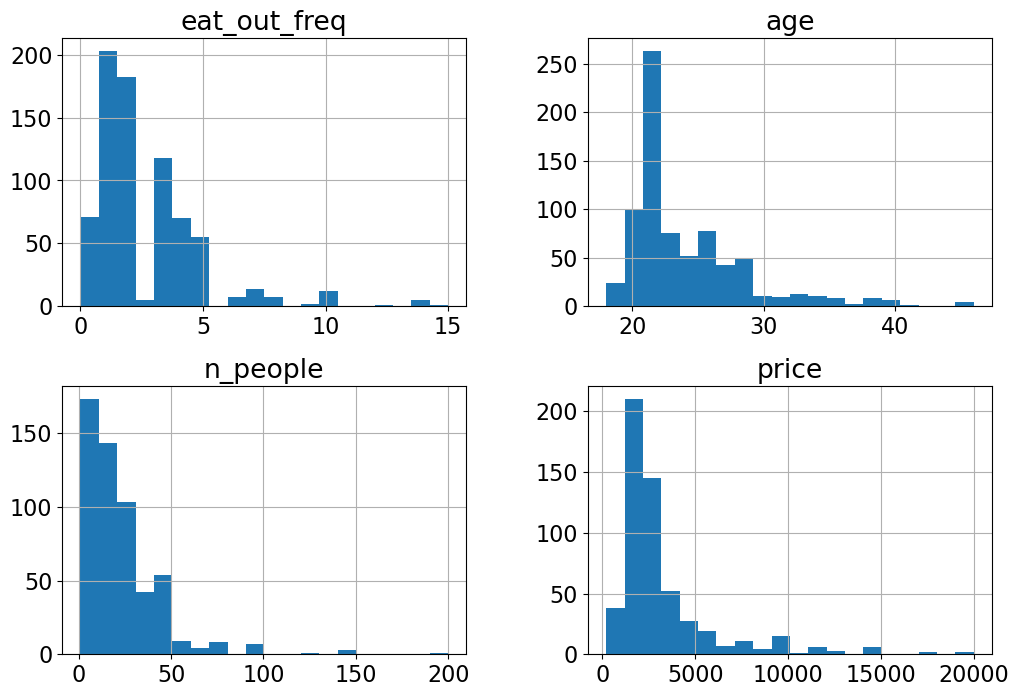

In [10]:
X_train.hist(bins=20, figsize=(12, 8));

Do you see anything interesting in these plots? 

In [11]:
X_train['food_type'].value_counts()

food_type
Other                189
Canadian/American    131
Chinese              102
Indian                36
Italian               32
Thai                  20
Fusion                18
Mexican               17
fusion                 3
Quebecois              1
Name: count, dtype: int64

Error in data collection? Probably "Fusion" and "fusion" categories should be combined?

In [12]:
X_train['food_type'] = X_train['food_type'].replace("fusion", "Fusion")
X_test['food_type'] = X_test['food_type'].replace("fusion", "Fusion")

In [13]:
X_train['food_type'].value_counts()

food_type
Other                189
Canadian/American    131
Chinese              102
Indian                36
Italian               32
Fusion                21
Thai                  20
Mexican               17
Quebecois              1
Name: count, dtype: int64

Again, usually we should spend lots of time in EDA, but let's stop here so that we have time to learn about transformers and pipelines.   

<br><br>

### Dummy Classifier

In [14]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
scores = cross_validate(dummy, X_train, y_train, return_train_score=True)
pd.DataFrame(scores)

fit_time  score_time  test_score  train_score
0  0.000870    0.000942    0.516556     0.514950
1  0.000575    0.000392    0.516556     0.514950
2  0.000965    0.000485    0.516556     0.514950
3  0.000537    0.000366    0.513333     0.515755
4  0.000498    0.000356    0.513333     0.515755

We have a relatively balanced distribution of both 'like' and 'dislike' classes.

<br><br>

### Let's try KNN on this data

Do you think KNN would work directly on `X_train` and `y_train`?

In [15]:
# Preprocessing and pipeline
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
# knn.fit(X_train, y_train)

We need to preprocess the data before passing it to ML models. What are the different types of features in the data? 

In [16]:
X_train.head()

north_america  eat_out_freq  age  n_people   price          food_type  \
80             No           2.0   21      30.0  2200.0            Chinese   
934           Yes           4.0   21      30.0  3000.0  Canadian/American   
911            No           4.0   20      40.0  2500.0  Canadian/American   
459           Yes           5.0   21       NaN     NaN          Quebecois   
62            Yes           2.0   24      20.0  3000.0             Indian   

    noise_level good_server  \
80         high          No   
934         low         Yes   
911      medium         Yes   
459         NaN         NaN   
62         high         Yes   

                                                                                                                    comments  \
80                                                                The environment was very not clean. The food tasted awful.   
934  The building and the room gave a very comfy feeling. Immediately after sitting down it felt like we were right at home.   
911                                                                                                             I was hungry   
459                                                                                                                      NaN   
62                                                                                                                 bad taste   

    restaurant_name  
80              NaN  
934             NaN  
911         Chambar  
459             NaN  
62     east is east

- What all transformations we need to apply before training a machine learning model? 
- Can we group features based on what type of transformations we would like to apply?

In [17]:
X_train.columns

Index(['north_america', 'eat_out_freq', 'age', 'n_people', 'price',
       'food_type', 'noise_level', 'good_server', 'comments',
       'restaurant_name'],
      dtype='object')

In [18]:
X_train['noise_level'].value_counts()

noise_level
medium        232
low           186
high           75
no music       37
crazy loud     18
Name: count, dtype: int64

In [19]:
numeric_feats = ['age', 'n_people', 'price'] # Continuous and quantitative features
categorical_feats = ['north_america', 'food_type'] # Discrete and qualitative features
binary_feats = ['good_server'] # Categorical features with only two possible values 
ordinal_feats = ['noise_level'] # Some natural ordering in the categories 
noise_cats = ['no music', 'low', 'medium', 'high', 'crazy loud']
drop_feats = ['comments', 'restaurant_name'] # Let's drop them for now. 

<br><br>

Let's begin with numeric features. What if we just use numeric features to train a KNN model? Would it work? 

In [20]:
# knn.fit(X_train[numeric_feats], y_train)
X_train_num = X_train[numeric_feats]
X_test_num = X_test[numeric_feats]

We need to deal with NaN values. 

### sklearn's `SimpleImputer` 

In [21]:
# Impute numeric features using SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(X_train_num)
X_train_num_imp = imputer.transform(X_train_num)
X_test_num_imp = imputer.transform(X_test_num)

In [22]:
knn.fit(X_train_num_imp, y_train)

KNeighborsClassifier()

No more errors. It worked! Let's try cross validation. 

In [23]:
cross_val_score(knn, X_train_num_imp, y_train).mean()

0.5418278145695364

We have slightly improved results in comparison to the dummy model. 

### Discussion questions 

- What's the difference between sklearn estimators and transformers?  
- Can you think of a better way to impute missing values? 

<br><br><br><br>

Do we need to scale the data? 

In [24]:
X_train[numeric_feats]

age  n_people   price
80    21      30.0  2200.0
934   21      30.0  3000.0
911   20      40.0  2500.0
459   21       NaN     NaN
62    24      20.0  3000.0
..   ...       ...     ...
106   27      10.0  1500.0
333   24      12.0   800.0
393   20       5.0  1500.0
376   20       NaN     NaN
525   20      50.0  3000.0

[753 rows x 3 columns]

In [25]:
# Scale the imputed data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_num_imp)
X_train_num_imp_scaled = scaler.transform(X_train_num_imp)
X_test_num_imp_scaled = scaler.transform(X_test_num_imp)

### What are some alternative methods for scaling?
- [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html): Transform each feature to a desired range
- [RobustScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html): Scale features using median and quantiles. Robust to outliers. 
- [Normalizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html): Works on rows rather than columns. Normalize examples individually to unit norm.
- [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html): A scaler that scales each feature by its maximum absolute value.
    - What would happen when you apply `StandardScaler` to sparse data?    
- You can also apply custom scaling on columns using [`FunctionTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html). For example, when a column follows the power law distribution (a handful of your values have many data points whereas most other values have few data points) log scaling is helpful.    

- For now, let's focus on `StandardScaler`. Let's carry out cross-validation

In [26]:
cross_val_score(knn, X_train_num_imp_scaled, y_train)

array([0.55629139, 0.49006623, 0.56953642, 0.54      , 0.53333333])

In this case, we don't see a big difference with `StandardScaler`. But usually, scaling is a good idea. 

- This worked but are we doing anything wrong here? 
- What's the problem with calling `cross_val_score` with preprocessed data? 
- How would you do it properly?
<br><br><br><br>

In [27]:
# Create a pipeline 
pipe_knn = make_pipeline(
    SimpleImputer(strategy = "median"),
    StandardScaler(),
    KNeighborsClassifier()
)

In [28]:
cross_val_score(pipe_knn, X_train_num, y_train).mean()

0.5245916114790287

- What all things are happening under the hood? 
- Why is this a better approach? 

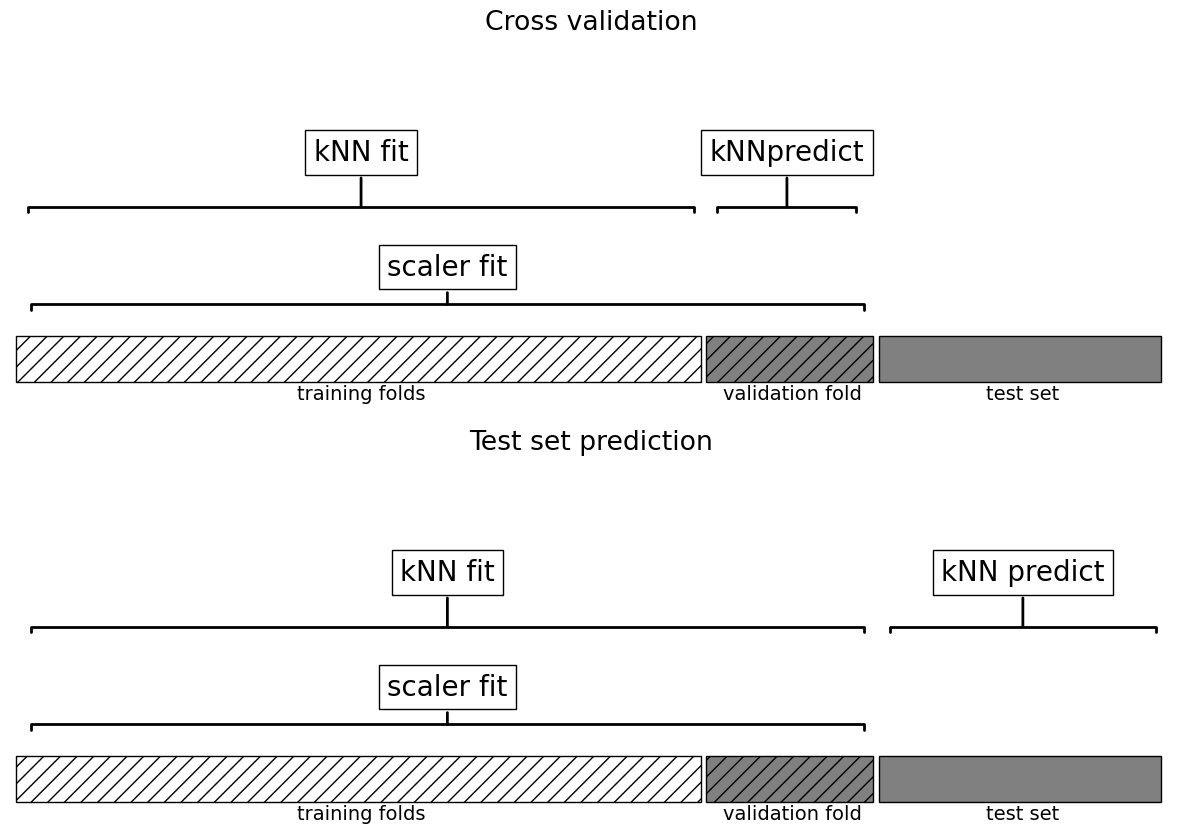

In [29]:
plot_improper_processing("kNN")

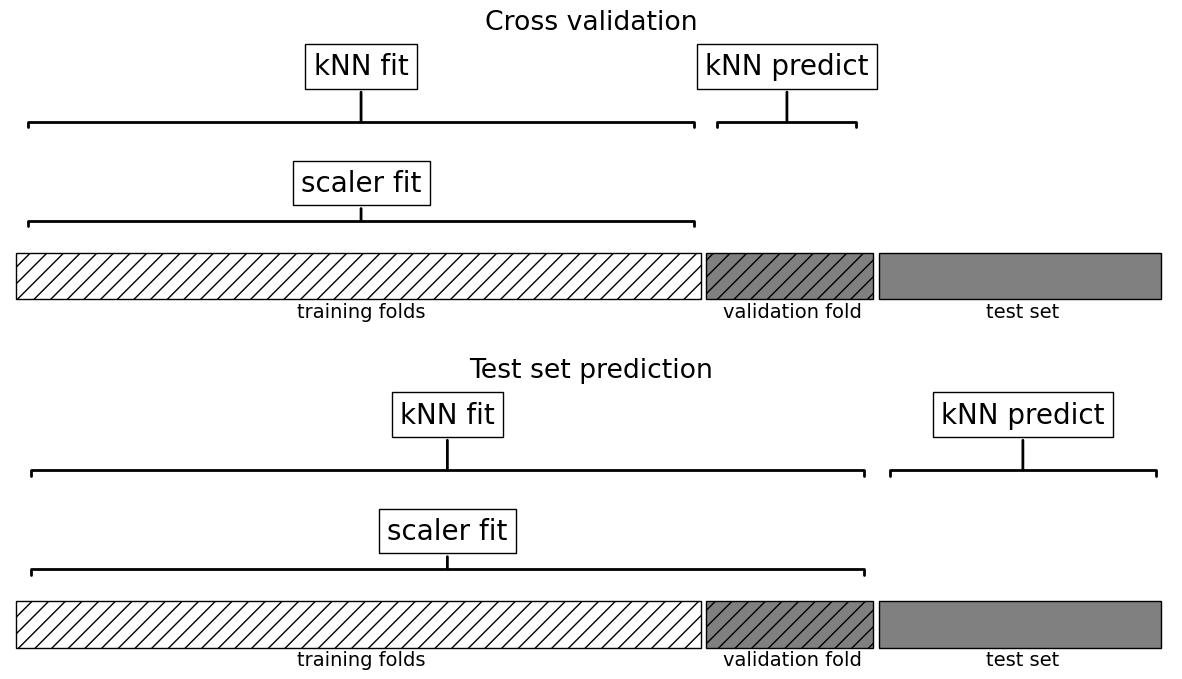

In [30]:
plot_proper_processing("kNN")

<br><br><br><br>

### Categorical features

Let's assess the scores using categorical features.

In [31]:
X_train['food_type'].value_counts()

food_type
Other                189
Canadian/American    131
Chinese              102
Indian                36
Italian               32
Fusion                21
Thai                  20
Mexican               17
Quebecois              1
Name: count, dtype: int64

In [32]:
X_train[categorical_feats]

north_america          food_type
80                    No            Chinese
934                  Yes  Canadian/American
911                   No  Canadian/American
459                  Yes          Quebecois
62                   Yes             Indian
..                   ...                ...
106                   No            Chinese
333                   No              Other
393                  Yes  Canadian/American
376                  Yes                NaN
525  Don't want to share            Chinese

[753 rows x 2 columns]

In [33]:
X_train['north_america'].value_counts()

north_america
Yes                    415
No                     330
Don't want to share      8
Name: count, dtype: int64

In [34]:
X_train['food_type'].value_counts()

food_type
Other                189
Canadian/American    131
Chinese              102
Indian                36
Italian               32
Fusion                21
Thai                  20
Mexican               17
Quebecois              1
Name: count, dtype: int64

In [35]:
X_train_cat = X_train[categorical_feats]
X_test_cat = X_test[categorical_feats]

In [36]:
# One-hot encoding of categorical features 
from sklearn.preprocessing import OneHotEncoder
# Define and fit OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)
ohe.fit(X_train_cat)
X_train_cat_ohe  = ohe.transform(X_train_cat) # transform the train set
X_test_cat_ohe  = ohe.transform(X_test_cat) # transform the test set

In [37]:
X_train_cat_ohe

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

- It's a sparse matrix. 
- Why? What would happen if we pass `sparse_output=False`? Why we might want to do that? 

In [38]:
# Get the OHE feature names 
ohe_feats = ohe.get_feature_names_out(categorical_feats).tolist()
pd.DataFrame(X_train_cat_ohe, columns = ohe_feats)

north_america_Don't want to share  north_america_No  north_america_Yes  \
0                                  0.0               1.0                0.0   
1                                  0.0               0.0                1.0   
2                                  0.0               1.0                0.0   
3                                  0.0               0.0                1.0   
4                                  0.0               0.0                1.0   
..                                 ...               ...                ...   
748                                0.0               1.0                0.0   
749                                0.0               1.0                0.0   
750                                0.0               0.0                1.0   
751                                0.0               0.0                1.0   
752                                1.0               0.0                0.0   

     food_type_Canadian/American  food_type_Chinese  food_type_Fusion  \
0                            0.0                1.0               0.0   
1                            1.0                0.0               0.0   
2                            1.0                0.0               0.0   
3                            0.0                0.0               0.0   
4                            0.0                0.0               0.0   
..                           ...                ...               ...   
748                          0.0                1.0               0.0   
749                          0.0                0.0               0.0   
750                          1.0                0.0               0.0   
751                          0.0                0.0               0.0   
752                          0.0                1.0               0.0   

     food_type_Indian  food_type_Italian  food_type_Mexican  food_type_Other  \
0                 0.0                0.0                0.0              0.0   
1                 0.0                0.0                0.0              0.0   
2                 0.0                0.0                0.0              0.0   
3                 0.0                0.0                0.0              0.0   
4                 1.0                0.0                0.0              0.0   
..                ...                ...                ...              ...   
748               0.0                0.0                0.0              0.0   
749               0.0                0.0                0.0              1.0   
750               0.0                0.0                0.0              0.0   
751               0.0                0.0                0.0              0.0   
752               0.0                0.0                0.0              0.0   

     food_type_Quebecois  food_type_Thai  food_type_nan  
0                    0.0             0.0            0.0  
1                    0.0             0.0            0.0  
2                    0.0             0.0            0.0  
3                    1.0             0.0            0.0  
4                    0.0             0.0            0.0  
..                   ...             ...            ...  
748                  0.0             0.0            0.0  
749                  0.0             0.0            0.0  
750                  0.0             0.0            0.0  
751                  0.0             0.0            1.0  
752                  0.0             0.0            0.0  

[753 rows x 13 columns]

In [39]:
cross_val_score(knn, X_train_cat_ohe, y_train)

array([0.53642384, 0.53642384, 0.50993377, 0.51333333, 0.47333333])

Are we breaking the golden rule here? Let's do this properly with a pipeline. 

In [40]:
# Code to create a pipeline for OHE and KNN
pipe_ohe_knn = make_pipeline(OneHotEncoder(), KNeighborsClassifier())

In [41]:
cross_val_score(pipe_ohe_knn, X_train_cat, y_train)

/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 140, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
  File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
  File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/pipeline.py", line 749, in score
    Xt = transform.transform(Xt)
  File "/Users/kvarada/miniconda3/envs/cpsc330/lib/python3.10/site-packages/sklearn/utils/_set_output.py", line 140, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
  File "/Users/kvarada/miniconda3/envs/cp

array([       nan, 0.53642384, 0.56291391, 0.54666667, 0.56      ])

- What's wrong here? 
- How can we fix this? 

In [42]:
# Fix the OHE

pipe_ohe_knn = make_pipeline(OneHotEncoder(handle_unknown="ignore"), KNeighborsClassifier())

In [43]:
cross_val_score(pipe_ohe_knn, X_train_cat, y_train).mean()

0.5537836644591612

Right now we are working with numeric and categorical features separately. But ideally when we create a model, we need to use all these features together. 

**Enter column transformer!**

How can we vertically stack  
- preprocessed numeric features
- preprocessed binary features, and  
- preprocessed categorical features?

Let's define a column transformer. 

In [44]:
from sklearn.compose import make_column_transformer

numeric_transformer = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
binary_transformer = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(drop="if_binary"))
categorical_transformer = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore", sparse_output=False))

preprocessor = make_column_transformer(
    (numeric_transformer, numeric_feats), 
    (binary_transformer, binary_feats), 
    (categorical_transformer, categorical_feats),     
)

How does the transformed data look like? 

In [45]:
transformed = preprocessor.fit_transform(X_train)

In [46]:
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'n_people', 'price']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'))]),
                                 ['good_server']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['north_america', 'food_type'])])

In [47]:
# Getting feature names from a column transformer
ohe_feat_names = preprocessor.named_transformers_['pipeline-3']['onehotencoder'].get_feature_names_out(categorical_feats).tolist()
ohe_feat_names

["north_america_Don't want to share",
 'north_america_No',
 'north_america_Yes',
 'food_type_Canadian/American',
 'food_type_Chinese',
 'food_type_Fusion',
 'food_type_Indian',
 'food_type_Italian',
 'food_type_Mexican',
 'food_type_Other',
 'food_type_Quebecois',
 'food_type_Thai']

In [48]:
# feat_names = numeric_feats + binary_feats + ohe_feat_names

In [49]:
# pd.DataFrame(preprocessor.fit_transform(X_train), columns = feat_names)

We have new columns for the categorical features. Let's create a pipeline with the preprocessor and SVC. 

In [50]:
svc_num_cat_pipe = make_pipeline(preprocessor, SVC())
cross_val_score(svc_num_cat_pipe, X_train, y_train).mean()

0.6825960264900662

We are getting better results! 
<br><br><br>

### Incorporating text features 

We haven't incorporated the comments feature into our pipeline yet, even though it holds significant value in indicating whether the restaurant was liked or not.

In [51]:
X_train

north_america  eat_out_freq  age  n_people   price  \
80                    No           2.0   21      30.0  2200.0   
934                  Yes           4.0   21      30.0  3000.0   
911                   No           4.0   20      40.0  2500.0   
459                  Yes           5.0   21       NaN     NaN   
62                   Yes           2.0   24      20.0  3000.0   
..                   ...           ...  ...       ...     ...   
106                   No           3.0   27      10.0  1500.0   
333                   No           1.0   24      12.0   800.0   
393                  Yes           4.0   20       5.0  1500.0   
376                  Yes           5.0   20       NaN     NaN   
525  Don't want to share           4.0   20      50.0  3000.0   

             food_type noise_level good_server  \
80             Chinese        high          No   
934  Canadian/American         low         Yes   
911  Canadian/American      medium         Yes   
459          Quebecois         NaN         NaN   
62              Indian        high         Yes   
..                 ...         ...         ...   
106            Chinese      medium         Yes   
333              Other      medium         Yes   
393  Canadian/American         low          No   
376                NaN         NaN         NaN   
525            Chinese        high         Yes   

                                                                                                                    comments  \
80                                                                The environment was very not clean. The food tasted awful.   
934  The building and the room gave a very comfy feeling. Immediately after sitting down it felt like we were right at home.   
911                                                                                                             I was hungry   
459                                                                                                                      NaN   
62                                                                                                                 bad taste   
..                                                                                                                       ...   
106                                                                                                      Food wasn't great.    
333                                                                                                                      NaN   
393                                                                                                                      NaN   
376                                                                                                                      NaN   
525                                                                                                                      NaN   

    restaurant_name  
80              NaN  
934             NaN  
911         Chambar  
459             NaN  
62     east is east  
..              ...  
106             NaN  
333             NaN  
393             NaN  
376             NaN  
525        Haidilao  

[753 rows x 10 columns]

Let's create bag-of-words representation of the `comments` feature. But first we need to impute the rows where there are no comments. There is a small complication if we want to put `SimpleImputer` and `CountVectorizer` in a pipeline. 
- `SimpleImputer` takes a 2D array as input and produced 2D array as output. 
- `CountVectorizer` takes a 1D array as input. 

To deal with this, we will use sklearn's `FunctionTransformer` to convert the 2D output of `SimpleImputer` into a 1D array which can be passed to `CountVectorizer` as input. 

In [52]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import CountVectorizer

reshape_for_countvectorizer = FunctionTransformer(lambda X: X.squeeze(), validate=False)
text_transformer = make_pipeline(SimpleImputer(strategy="constant", fill_value="missing"), 
                          reshape_for_countvectorizer, 
                          CountVectorizer(max_features=100, stop_words="english"))
text_pipe = make_pipeline(text_transformer, SVC())
cross_val_score(text_pipe, X_train[['comments']], y_train).mean()

0.6467019867549668

Pretty good scores just with text features! Do we get better scores if we combine all features? Let's define a column transformer which carries out 
- imputation and scaling on numeric features
- imputation and one-hot encoding with `drop="if_binary"` on binary features
- imputation and one-hot encoding with `handle_unknown="ignore"` on categorical features
- imputation, reshaping, and bag-of-words transformation on the text feature

In [53]:
from sklearn.feature_extraction.text import CountVectorizer
text_feat = ['comments']
preprocessor = make_column_transformer(
    (numeric_transformer, numeric_feats),
    (binary_transformer, binary_feats),    
    (categorical_transformer, categorical_feats),
    (text_transformer, text_feat)
)

In [54]:
preprocessor.fit_transform(X_train)

<753x116 sparse matrix of type '<class 'numpy.float64'>'
	with 5670 stored elements in Compressed Sparse Row format>

In [55]:
svc_num_cat_text_pipe = make_pipeline(preprocessor, SVC())
cross_val_score(svc_num_cat_text_pipe, X_train, y_train).mean()

0.6972185430463577

No big improvement when we combine all features. 